# PART 1 - EXPLORATORY DATA ANALYSIS

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read file

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## Add count column and resample based on 15-minute time intervals

In [5]:
logins['count'] = 1
logins = logins.set_index('login_time')

In [6]:
logins_resampled = logins.resample('15min').sum()
logins_resampled.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


## Plot the timeseries

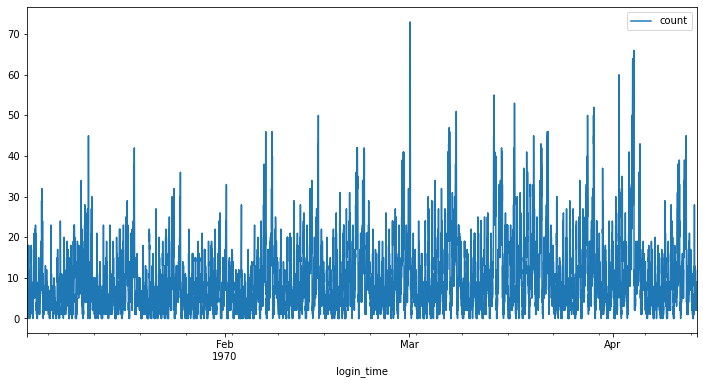

In [9]:
logins_resampled.plot(figsize=(12,6))

This isn't the best plot for visualization, but we can see that the logins have a sinusoidal pattern that may be increasing. Next, I will try to smooth the plot with a window.

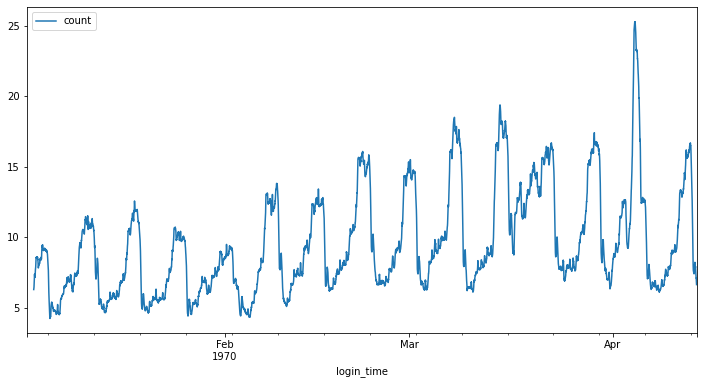

In [12]:
logins_resampled.rolling(window=100).mean().plot(figsize=(12,6))

We can see that the logins are indeed increasing on average over time. The next question is: are logins greater on the weekdays or weekends? To answer this question, I will plot a single example month to get an idea of the patterns.

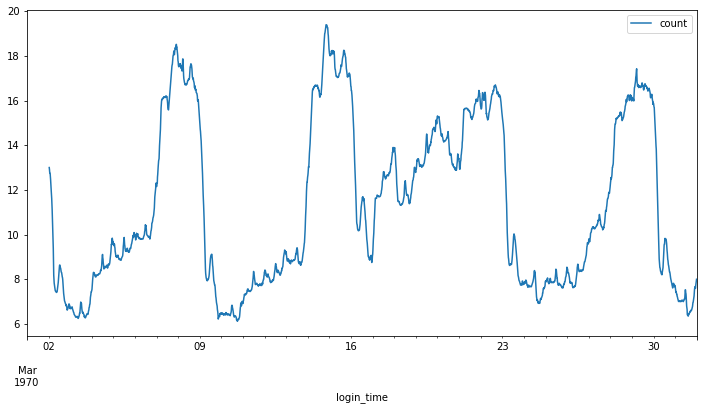

In [13]:
logins_resampled.loc['1970-03'].rolling(window=100).mean().plot(figsize=(12,6))

Logins definitely increase on the weekends. Finally, the last question is: at what times of the day are logins the greatest? To answer this question, I will plot a single weekend. Looking at a calendar of March 1970, I see the first weekend is the 6th through the 8th. 

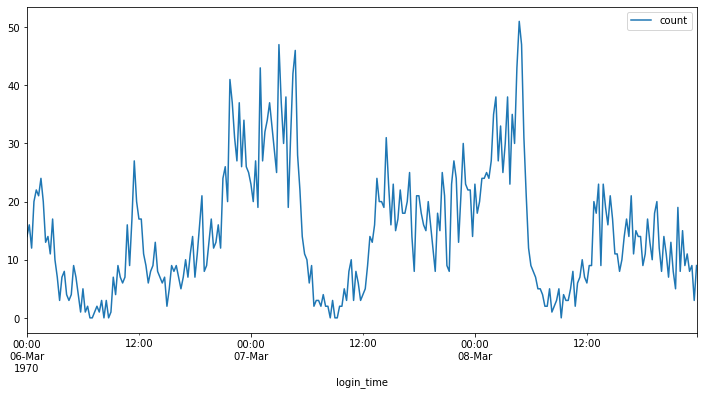

In [14]:
logins_resampled.loc['1970-03-06':'1970-03-08'].plot(figsize=(12,6))

Logins are greatest around midnight on the weekend. Now I will look at an arbitrary weekday.

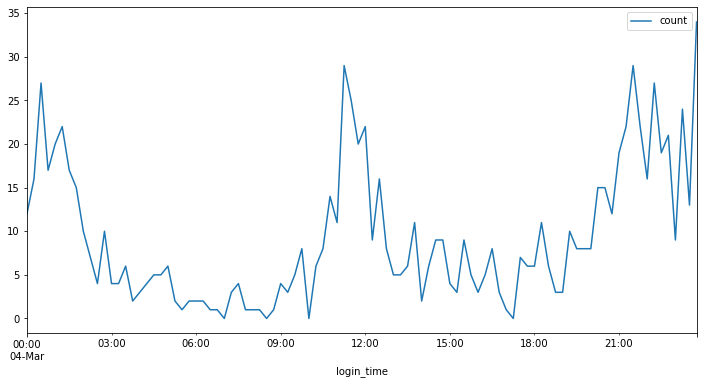

In [15]:
logins_resampled.loc['1970-03-04'].plot(figsize=(12,6))

On the arbitrary weekday, logins spike around noon and midnight. 